In [1]:
from typing import Tuple, List
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/geolife-cars.csv')
cars_10 = pd.read_csv('data/geolife-cars-ten-percent.csv')
cars_30 = pd.read_csv('data/geolife-cars-thirty-percent.csv')
cars_60 = pd.read_csv('data/geolife-cars-sixty-percent.csv')

In [3]:
df.head()

,date,id_,x,y
0,2008-05-17 07:38:36,085-20080517073836,-15.366613,0.534397
1,2008-05-17 07:38:38,085-20080517073836,-15.365054,0.531723
2,2008-05-17 07:38:40,085-20080517073836,-15.361270,0.529248
3,2008-05-17 07:38:42,085-20080517073836,-15.354479,0.527664
4,2008-05-17 07:38:44,085-20080517073836,-15.347689,0.526376


# Part 1: Computation of d(q,e)

In [4]:
def d(q: Tuple[float, float], e: List[Tuple[float, float]]) -> float:
    """
    Computes the distance between a point q and a line segment e.

    Args:
        q: A tuple representing the point q.
        e: A list representing the line segment e as (a, b).

    Returns:
        The distance between the point q and the line segment e.
    """
    # Let the start point of e be a, and end point be b 
    a, b = e
    # Compute the dot product of vectors aq and ab
    dot_product = (q[0] - a[0]) * (b[0] - a[0]) + (q[1] - a[1]) * (b[1] - a[1])
    # Compute the length of ab (squared)
    ab_length_sq = (b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2
    # Compute the projection of vector aq onto vector ab
    projection = dot_product / ab_length_sq
    if projection <= 0:
        # Point q is closest to the start point (a) of line segment e
        return ((q[0] - a[0]) ** 2 + (q[1] - a[1]) ** 2) ** 0.5
    elif projection >= 1:
        # Point q is closest to the end point (b) of line segment e 
        return ((q[0] - b[0]) ** 2 + (q[1] - b[1]) ** 2) ** 0.5
    else:
        # Point q is closest to the point on line segment e between its start (a) and end (b) points
        closest_x = a[0] + projection * (b[0] - a[0])
        closest_y = a[1] + projection * (b[1] - a[1])
        return ((q[0] - closest_x) ** 2 + (q[1] - closest_y) ** 2) ** 0.5

# Part 2: TS-Greedy Algorithm

In [5]:
def TS_greedy(T: List[Tuple[float, float]], eps: float) -> List[Tuple[float, float]]:
    """
    Computes an epsilon-simplification of the trajectory T using a greedy algorithm.

    Arguments:
        T: A list of tuples representing the trajectory T as [(x1, y1), ..., (xn, yn)].
        eps: A float number representing the maximum error of the simplification.

    Returns:
        A list of tuples representing the epsilon-simplification of the trajectory T.
    """
    if len(T) < 3:
        # Base case, the trajectory cannot be simplified further
        return T
    else:
        # Initialize the simplified trajectory, T_star, with the first and last points of the trajectory
        T_star = [T[0], T[-1]]
        # Find the point with max distance
        dmax = 0
        index = 0
        for i in range(1, len(T) - 1):
            dis = d(T[i], T_star)
            if dis > dmax:
                index = i 
                dmax = dis
        # Check if the epsilon criterion is met
        if dmax <= eps: 
            # T_star is sufficient to represent the current trajectory within max error epsilon
            return T_star 
        else:
            # Max distance > epsilon
            # Recurse on left and right, seperated by the point with max distance;
            return TS_greedy(T[0:index], eps) + TS_greedy(T[index:], eps) 

# Part 3: Plotting Simplified Trajectories with Different ε

In [6]:
# filter out trajectory ID 128-20080503104400
trajec = df[df["id_" ] == "128-20080503104400"]
# t stores the originial list
t = list(zip(trajec.x, trajec.y))
#print(t)
print("The length of the orginal trajectory is: ")
print(len(t))

The length of the orginal trajectory is: 
321


In [7]:
# t_star_003 is the simplified list for eps = 0.03
t_star_003 = TS_greedy(t, 0.03)
#print(t_star_003)
print("The length of simplified trajectory 128-20080503104400 (ε = 0.03) is: ")
print(len(t_star_003))

The length of simplified trajectory 128-20080503104400 (ε = 0.03) is: 
32


This figure contains 128-20080503104400 and its simplification when ε = 0.03


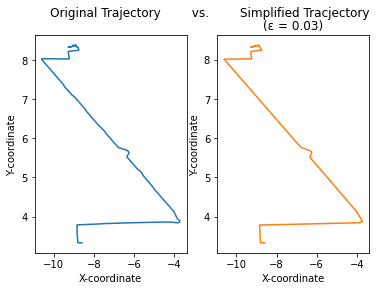

In [8]:
# plot t and t_star_003
print("This figure contains 128-20080503104400 and its simplification when ε = 0.03")
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot([p[0] for p in t], [p[1] for p in t], label = "Original Trajectory")
ax2.plot([p[0] for p in t_star_003], [p[1] for p in t_star_003],'tab:orange', label = "Simplified Trajectory")
plt.suptitle("       Original Trajectory        vs.        Simplified Tracjectory")
plt.title("(ε = 0.03)", loc = 'center')
ax1.set_xlabel("X-coordinate")
ax1.set_ylabel("Y-coordinate")
ax2.set_xlabel("X-coordinate")
ax2.set_ylabel("Y-coordinate")
plt.savefig('4.2-1.png')
plt.show()

In [9]:
# t_star_01 is the simplified list for eps = 0.1
t_star_01 = TS_greedy(t, 0.1)
#print(t_star_01)
print("The length of simplified trajectory 128-20080503104400 (ε = 0.1) is: ")
print(len(t_star_01))

The length of simplified trajectory 128-20080503104400 (ε = 0.1) is: 
26


This figure contains 128-20080503104400 and its simplification when ε = 0.1


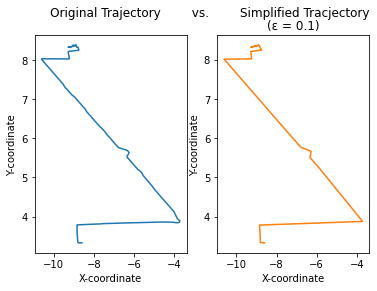

In [10]:
# plot t and t_star_01
print("This figure contains 128-20080503104400 and its simplification when ε = 0.1")
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot([p[0] for p in t], [p[1] for p in t], label = "Original Trajectory")
ax2.plot([p[0] for p in t_star_01], [p[1] for p in t_star_01],'tab:orange', label = "Simplified Trajectory")
plt.suptitle("       Original Trajectory        vs.        Simplified Tracjectory")
plt.title("(ε = 0.1)", loc = 'center')
ax1.set_xlabel("X-coordinate")
ax1.set_ylabel("Y-coordinate")
ax2.set_xlabel("X-coordinate")
ax2.set_ylabel("Y-coordinate")
plt.savefig('4.2-2.png')
plt.show()

In [11]:
# t_star_03 is the simplified list for eps = 0.3
t_star_03 = TS_greedy(t, 0.3)
#print(t_star_03)
print("The length of simplified trajectory 128-20080503104400 (ε = 0.3) is: ")
print(len(t_star_03))

The length of simplified trajectory 128-20080503104400 (ε = 0.3) is: 
8


This figure contains 128-20080503104400 and its simplification when ε = 0.3


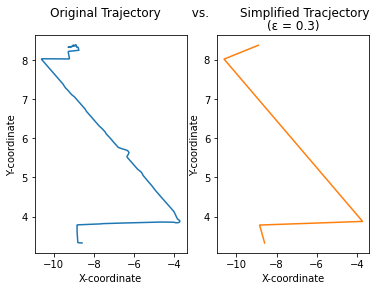

In [12]:
# plot t and t_star_03
print("This figure contains 128-20080503104400 and its simplification when ε = 0.3")
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot([p[0] for p in t], [p[1] for p in t], label = "Original Trajectory")
ax2.plot([p[0] for p in t_star_03], [p[1] for p in t_star_03],'tab:orange', label = "Simplified Trajectory")
plt.suptitle("       Original Trajectory        vs.        Simplified Tracjectory")
plt.title("(ε = 0.3)", loc = 'center')
ax1.set_xlabel("X-coordinate")
ax1.set_ylabel("Y-coordinate")
ax2.set_xlabel("X-coordinate")
ax2.set_ylabel("Y-coordinate")
plt.savefig('4.2-3.png')
plt.show()


# Part 4: Compression Ratio Calculation

In [13]:
# compression ratio |T|/|T′| for trajectory 128-20080503104400, using TS-greedy for epsilon = 0.03
print("The compression ratio |T|/|T′| for trajectory 128-20080503104400, using TS-greedy for epsilon = 0.03, is: ")
print(len(t)/len(t_star_003))

The compression ratio |T|/|T′| for trajectory 128-20080503104400, using TS-greedy for epsilon = 0.03, is: 
10.03125


In [14]:
# compression ratio |T|/|T′| for trajectory 010-20081016113953, using TS-greedy for epsilon = 0.03
# filter out trajectory ID 010-20081016113953
trajec2 = df[df["id_" ] == "010-20081016113953"]
t2 = list(zip(trajec2.x, trajec2.y))
t2_star_003 = TS_greedy(t2, 0.03)
print("The compression ratio |T|/|T′| for trajectory 010-20081016113953, using TS-greedy for epsilon = 0.03, is: ")
print(len(t2)/len(t2_star_003))

The compression ratio |T|/|T′| for trajectory 010-20081016113953, using TS-greedy for epsilon = 0.03, is: 
27.15


In [15]:
# compression ratio |T|/|T′| for trajectory 115-20080520225850, using TS-greedy for epsilon = 0.03
# filter out trajectory ID 115-20080520225850
trajec3 = df[df["id_" ] == "115-20080520225850"]
t3 = list(zip(trajec3.x, trajec3.y))
t3_star_003 = TS_greedy(t3, 0.03)
print("The compression ratio |T|/|T′| for trajectory 115-20080520225850, using TS-greedy for epsilon = 0.03, is: ")
print(len(t3)/len(t3_star_003))

The compression ratio |T|/|T′| for trajectory 115-20080520225850, using TS-greedy for epsilon = 0.03, is: 
19.558823529411764


In [16]:
# compression ratio |T|/|T′| for trajectory 115-20080615225707, using TS-greedy for epsilon = 0.03
# filter out trajectory ID 115-20080615225707
trajec4 = df[df["id_" ] == "115-20080615225707"]
t4 = list(zip(trajec4.x, trajec4.y))
t4_star_003 = TS_greedy(t4, 0.03)
print("The compression ratio |T|/|T′| for trajectory 115-20080615225707, using TS-greedy for epsilon = 0.03, is: ")
print(len(t4)/len(t4_star_003)) 

The compression ratio |T|/|T′| for trajectory 115-20080615225707, using TS-greedy for epsilon = 0.03, is: 
21.205882352941178
